In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tiledb
from config import *

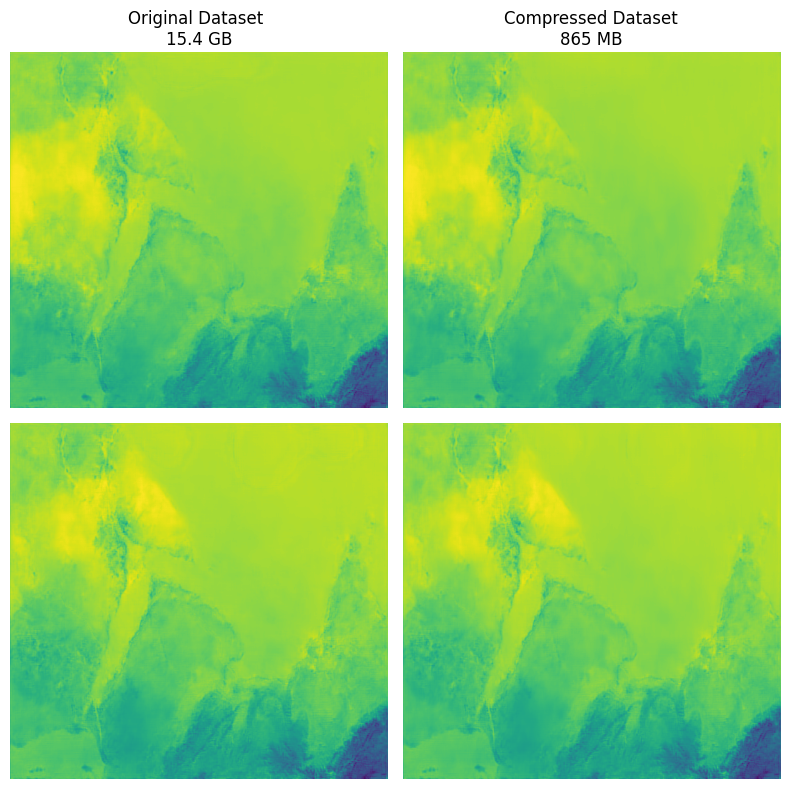

In [8]:
num_images = 2
with tiledb.open("ArrayD", "r") as D, tiledb.open("ArrayD_prime", "r") as D_prime:
    
    file_sizes = [("15.4 GB", "865 MB")] * num_images

    fig, axes = plt.subplots(num_images, 2, figsize=(8, 4 * num_images))
    for i in range(num_images):
        # Plot original image
        axes[i, 0].imshow(D[i]["Temperatures"], aspect='auto')
        axes[i, 0].axis('off')
        if i == 0:
            axes[i, 0].set_title(f"Original Dataset \n{file_sizes[i][0] if file_sizes else ''}")

        # Plot compressed image
        axes[i, 1].imshow(D_prime[i]["Temperatures"], aspect='auto')
        axes[i, 1].axis('off')
        if i == 0:
            axes[i, 1].set_title(f"Compressed Dataset\n{file_sizes[i][1] if file_sizes else ''}")

    plt.tight_layout()
    plt.show()

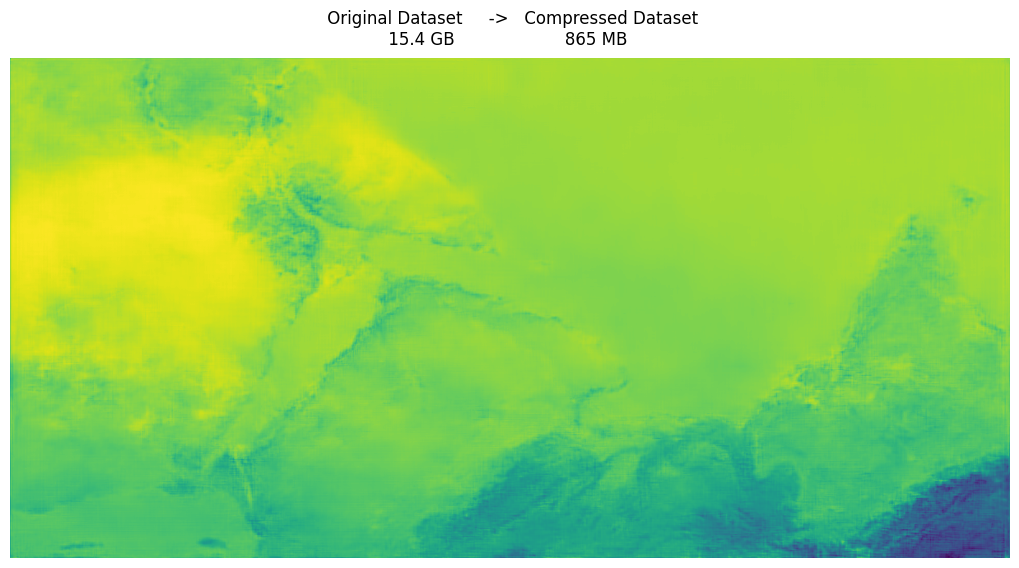

In [13]:
with tiledb.open("ArrayD", "r") as D, tiledb.open("ArrayD_prime", "r") as D_prime:

    file_sizes = ("15.4 GB", "865 MB")
    
    compressed = D_prime[100]["Temperatures"]
    fig = plt.figure(figsize=(10, 5))

    # Plot original image
    ax1 = fig.add_axes([0, 0, 1, 1])  # Left half of the figure
    ax1.imshow(compressed, aspect='auto')
    ax1.axis('off')

    original_label = "Original Dataset"
    compressed_label = "Compressed Dataset"
    arrow = "->"
    
    # Calculate the maximum width for alignment
    max_label_length = max(len(original_label), len(compressed_label), len(file_sizes[0]), len(file_sizes[1]))
    
    # Format each line with consistent padding
    line1 = f"{original_label.center(max_label_length)}  {arrow.center(5)}  {compressed_label.center(max_label_length)}"
    line2 = f"{file_sizes[0].center(max_label_length)}  {' '.center(5)}  {file_sizes[1].center(max_label_length)}"
    
    # Combine the lines
    aligned_text = f"{line1}\n{line2}"

    title_original = aligned_text
    ax1.set_title(title_original, fontsize=12, pad=10)

    plt.show()